In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp')
def imshow(img):
    plt.imshow(img, cmap='Greys_r',vmin = 0, vmax = 255)
    plt.show()
#change into binary image, threshold = 128 
img2 = np.zeros([len(img),len(img[0])],dtype=np.uint8)
for i in range(len(img)):
    for j in range(len(img[0])):
        if img[i][j][0] >= 128:
            img2[i][j] = 255
        else:
            img2[i][j] = 0

In [2]:
# Downsampling Lena from 512x512 to 64x64
img_64 = np.zeros([64,64],dtype=np.uint8)
for i in range(len(img_64)):
    for j in range(len(img_64)):
        img_64[i][j] = img2[i*8][j*8]
#imshow(img_64)

In [3]:
def h(b, c, d, e):
    if b == c:
        if d != b or e != b:
            return "q" 
        else:
            return "r"
    else:
        return "s"
def f(a1, a2, a3, a4):
    if a1 == a2 and a2 == a3 and a3 == a4 and a4 == "r":
        return 5
    else:
        a = 0
        for i in [a1, a2, a3, a4]:
            if i == "q":
                a += 1
        return a   

In [4]:
def yokoi(img):
    label = np.zeros([len(img),len(img[0])],dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] != 0:
                a1 = a2 = a3 = a4 = "s"
                b = img[i][j]
                # a1
                c = d = e = 0
                if j != len(img[0]) - 1 and i != 0:
                    c = img[i][j+1]
                    d = e = img[i-1][j+1]
                    e = img[i-1][j]
                elif i != 0:
                    e = img[i-1][j]
                elif j != len(img[0]) - 1:
                    c = img[i][j+1]
                a1 = h(b, c, d, e)
                #a2
                c = d = e = 0
                if j != 0 and i != 0:
                    c = img[i-1][j]
                    d = e = img[i-1][j-1]
                    e = img[i][j-1]
                elif i != 0:
                    c = img[i-1][j]
                elif j != 0:
                    e = img[i][j-1]  
                a2 = h(b, c, d, e)
                #a3
                c = d = e = 0
                if j != 0 and i != len(img) - 1:
                    c = img[i][j-1]
                    d = e = img[i+1][j-1]
                    e = img[i+1][j]
                elif i != len(img) - 1:
                    e = img[i+1][j]
                elif j != 0:
                    c = img[i][j-1]  
                a3 = h(b, c, d, e)
                #a4
                c = d = e = 0
                if j != len(img[0]) - 1 and i != len(img) - 1:
                    c = img[i+1][j]
                    d = e = img[i+1][j+1]
                    e = img[i][j+1]
                elif i != i != len(img) - 1:
                    c = img[i+1][j]
                elif j != len(img[0]) - 1:
                    e = img[i][j+1]  
                a4 = h(b, c, d, e)
                label[i][j] = f(a1, a2, a3, a4)
    return label

In [5]:
def pairRelOp(img):
    label = yokoi(img)
    label_pair = np.zeros([len(label) ,len(label[0])], str)
    for i in range(len(label)):
        for j in range(len(label[0])):
            if label[i][j] == 1:
                if 0 < i and label[i-1][j] == 1:
                    label_pair[i][j] = 'p'
                elif i < len(label)-1 and label[i+1][j] == 1:
                    label_pair[i][j] = 'p'
                elif j < len(label[0])-1 and label[i][j+1] == 1:
                    label_pair[i][j] = 'p'
                elif 0 < j and label[i][j-1] == 1:
                    label_pair[i][j] = 'p'
                else:
                    label_pair[i][j] = 'q'
            else:
                label_pair[i][j] = 'q'
    return label_pair

In [6]:
def conShrinkOp(img):
    label = yokoi(img)
    label_pair = pairRelOp(img)
    for i in range(len(label_pair)):# from up to down
        for j in range(len(label_pair[0])):# from left to right
            if label_pair[i][j] == 'p':# check only if label_pair[i][j] == 'p'
                if label[i][j] == 1:
                    img[i][j] = 0 # if we remove a pixel in img, update the yokoi label
                    label = yokoi(img)
    return img

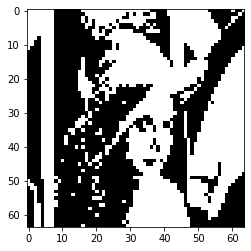

In [7]:
img_thin = img_64.copy()
imshow(img_64)

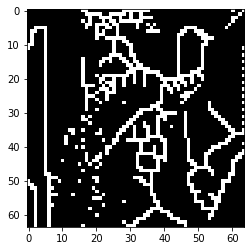

In [8]:
img_thin = img_64.copy()
tmp = 0
def count0(array2D):
    count = 0
    for i in array2D:
        for j in i:
            if j == 0:
                count += 1
    return count
while tmp != count0(img_thin):# loop stop when the img not change any more
    tmp = count0(img_thin)
    label_pair = pairRelOp(img_thin)
    img_thin = conShrinkOp(img_thin)
imshow(img_thin)

In [9]:
cv2.imwrite('img_thin.png', img_thin)

True